In [7]:
#Problem1
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("AB_NYC_2019.csv")
print(df.head())
print(df.info())
print(df.describe())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [8]:
print(df.isnull().sum())
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df = df.drop(columns=['last_review'])
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price         

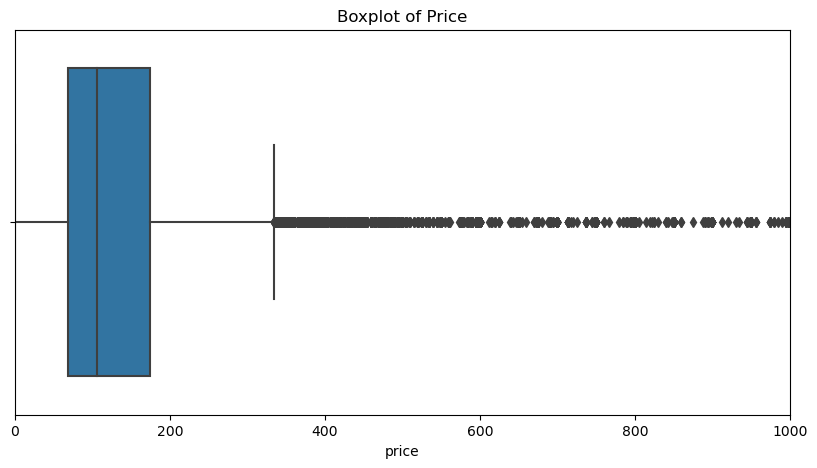

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.xlim(0, 1000) 
plt.title("Boxplot of Price")
plt.show()

In [37]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Q1:", Q1, " Q3:", Q3, " IQR:", IQR)
print("Lower Limit:", lower_limit, " Upper Limit:", upper_limit)

Q1: 69.0  Q3: 175.0  IQR: 106.0
Lower Limit: -90.0  Upper Limit: 334.0


In [38]:
df_clean = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)].copy()

print("Original DataFrame Shape:", df.shape)
print("Cleaned DataFrame Shape:", df_clean.shape)

Original DataFrame Shape: (48895, 15)
Cleaned DataFrame Shape: (45923, 15)


In [15]:
df["name"] = df["name"].str.strip().str.replace(r"\s+", " ", regex=True)
df["host_name"] = df["host_name"].str.strip().str.replace(r"\s+", " ", regex=True)
df["host_name"] = df["host_name"].str.title()
df["host_name"] = df["host_name"].fillna("Unknown")
unique_hosts = df["host_name"].nunique()
print("Unique Hosts after cleaning:", unique_hosts)

Unique Hosts after cleaning: 11429


In [16]:
#Probelm2
import numpy as np
from scipy import stats

# Price central tendency
price_mean = df_clean['price'].mean()
price_median = df_clean['price'].median()
price_mode = df_clean['price'].mode()[0]

# Number of reviews central tendency
reviews_mean = df_clean['number_of_reviews'].mean()
reviews_median = df_clean['number_of_reviews'].median()
reviews_mode = df_clean['number_of_reviews'].mode()[0]

print("Price - Mean:", price_mean, " Median:", price_median, " Mode:", price_mode)
print("Number of Reviews - Mean:", reviews_mean, " Median:", reviews_median, " Mode:", reviews_mode)

Price - Mean: 119.97031988328288  Median: 100.0  Mode: 100
Number of Reviews - Mean: 23.94266489558609  Median: 5.0  Mode: 0


In [17]:
print(f"The average price is {price_mean:.2f}, while the median price is {price_median:.2f}.")
print("Since the data is skewed by expensive listings, the median better represents the typical Airbnb price.")


The average price is 119.97, while the median price is 100.00.
Since the data is skewed by expensive listings, the median better represents the typical Airbnb price.


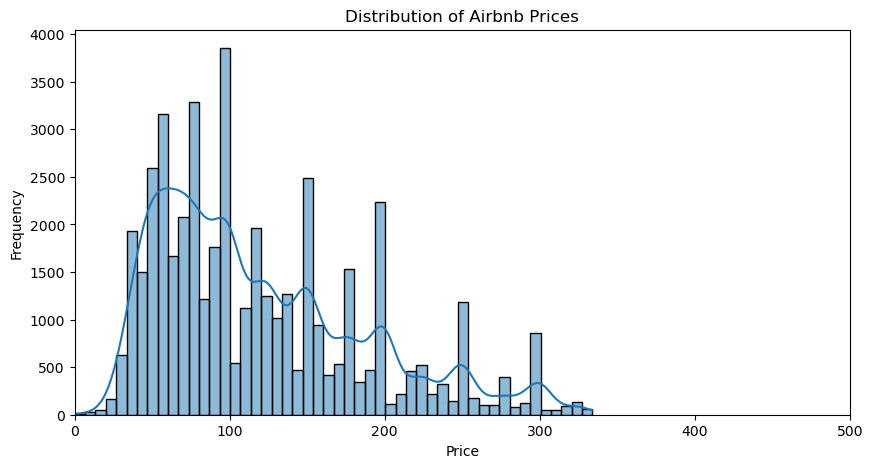

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean['price'], bins=50, kde=True)
plt.xlim(0, 500)   # limit to 500 for clarity (avoids extreme values dominating)
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


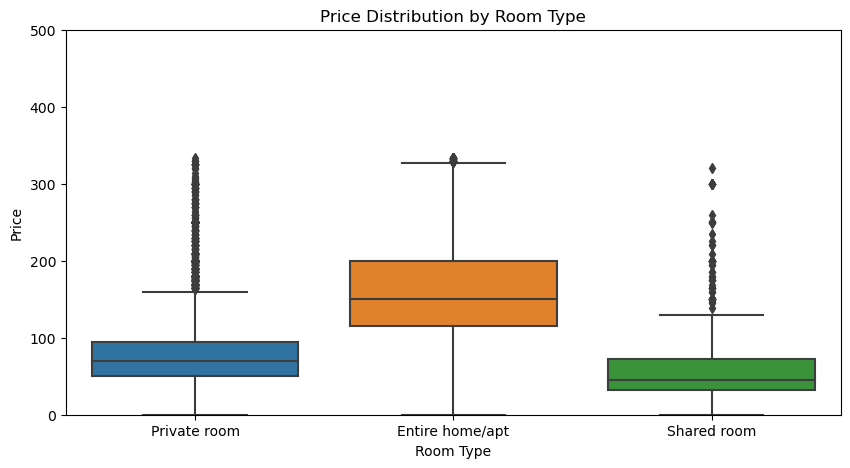

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x='room_type', y='price', data=df_clean)
plt.ylim(0, 500)   # limit to 500 for clearer view
plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

Population Mean: 6.639701239030551


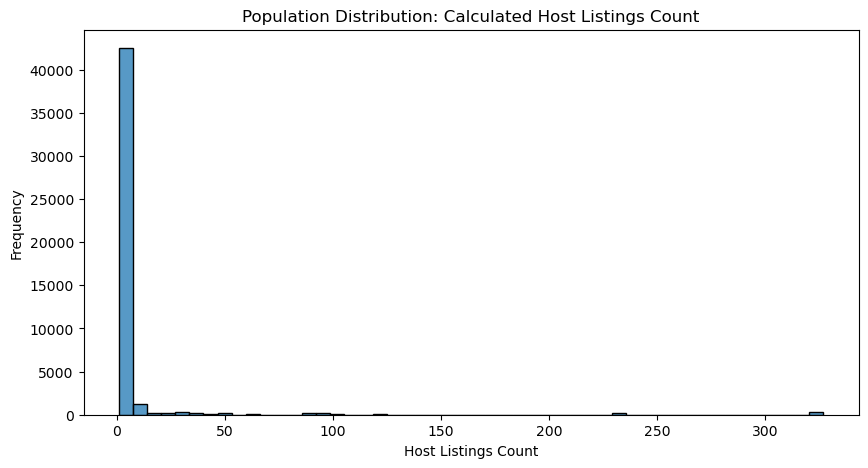

In [20]:
#Problem3
population = df_clean['calculated_host_listings_count']

# Population mean
pop_mean = population.mean()
print("Population Mean:", pop_mean)

# Plot histogram of population
plt.figure(figsize=(10,5))
sns.histplot(population, bins=50, kde=False)
plt.title("Population Distribution: Calculated Host Listings Count")
plt.xlabel("Host Listings Count")
plt.ylabel("Frequency")
plt.show()

In [21]:
import random

sample_means = []

# Perform sampling 1000 times
for i in range(1000):
    sample = population.sample(n=50, replace=True)  # random sample of size 50
    sample_means.append(sample.mean())

# Convert to Series
sample_means = pd.Series(sample_means)

print("Mean of Sample Means:", sample_means.mean())

Mean of Sample Means: 6.65634


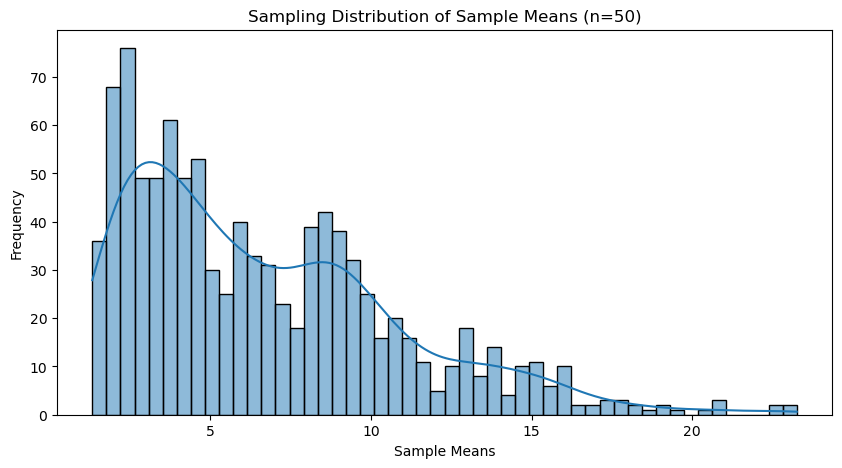

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(sample_means, bins=50, kde=True)
plt.title("Sampling Distribution of Sample Means (n=50)")
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.show()

In [23]:
print("Population Mean:", pop_mean)
print("Mean of Sample Means:", sample_means.mean())

Population Mean: 6.639701239030551
Mean of Sample Means: 6.65634


In [26]:
#Problem4
manhattan_prices = df_clean[df_clean['neighbourhood_group'] == 'Manhattan']['price']
brooklyn_prices = df_clean[df_clean['neighbourhood_group'] == 'Brooklyn']['price']

print("Number of listings in Manhattan:", len(manhattan_prices))
print("Number of listings in Brooklyn:", len(brooklyn_prices))

Number of listings in Manhattan: 19506
Number of listings in Brooklyn: 19415


In [27]:
from scipy import stats

# Perform t-test
t_stat, p_value = stats.ttest_ind(manhattan_prices, brooklyn_prices, equal_var=False)  # Welch’s t-test
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 60.28275947954299
p-value: 0.0


In [29]:
alpha = 0.05  # significance level

if p_value < alpha:
   print("Reject H0: There is Statistically significant difference")
else:
    print("Fail to reject H0: There is NOT a statistically significant difference")

Reject H0: There is Statistically significant difference


In [30]:
#Problem 5
bronx_filtered_1 = df_clean[
    (df_clean['neighbourhood_group'] == 'Bronx') &
    (df_clean['price'] < 100) &
    (df_clean['number_of_reviews'] > 10)
]

print("Number of listings (Boolean Indexing):", len(bronx_filtered_1))
bronx_filtered_1.head()

Number of listings (Boolean Indexing): 384


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room With A View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,54626,Cozy Bedroom By Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
433,149777,Artsy 1 Bedroom Apt. 20 Min To 42Nd Grand Cent...,716306,"Dee, Dre & Mama Shelley",Bronx,Woodlawn,40.89747,-73.86390,Entire home/apt,77,1,197,2.49,1,309
484,169306,Affordable & Cozy,806214,Vanessa,Bronx,University Heights,40.85811,-73.90675,Private room,37,4,117,1.21,1,232
557,206071,Yankee Stadium Oasis 2 Stops To Manhattan!,12221,Lori,Bronx,Concourse Village,40.82802,-73.92039,Private room,50,3,258,2.70,2,276


In [32]:
bronx_filtered_2 = df_clean.query("neighbourhood_group == 'Bronx' and price < 100 and number_of_reviews > 10")

print("Number of listings (Query):", len(bronx_filtered_2))
bronx_filtered_2.head()

Number of listings (Query): 384


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room With A View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,54626,Cozy Bedroom By Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
433,149777,Artsy 1 Bedroom Apt. 20 Min To 42Nd Grand Cent...,716306,"Dee, Dre & Mama Shelley",Bronx,Woodlawn,40.89747,-73.86390,Entire home/apt,77,1,197,2.49,1,309
484,169306,Affordable & Cozy,806214,Vanessa,Bronx,University Heights,40.85811,-73.90675,Private room,37,4,117,1.21,1,232
557,206071,Yankee Stadium Oasis 2 Stops To Manhattan!,12221,Lori,Bronx,Concourse Village,40.82802,-73.92039,Private room,50,3,258,2.70,2,276


In [33]:
grouped = df_clean.groupby(['neighbourhood_group', 'room_type']).agg(
    avg_price=('price', 'mean'),
    total_reviews=('number_of_reviews', 'sum')
)

print(grouped)

# Find the most expensive group
most_expensive = grouped['avg_price'].idxmax()
print("\nMost expensive on average:", most_expensive, "with avg price =", grouped['avg_price'].max())

                                      avg_price  total_reviews
neighbourhood_group room_type                                 
Bronx               Entire home/apt  112.195592          11442
                    Private room      60.595679          16312
                    Shared room       47.254237            431
Brooklyn            Entire home/apt  148.202080         256928
                    Private room      70.283443         213217
                    Shared room       48.036496           5791
Manhattan           Entire home/apt  181.688596         209705
                    Private room      98.057700         208197
                    Shared room       75.939785          10241
Queens              Entire home/apt  131.328388          59646
                    Private room      65.732319          93349
                    Shared room       46.989691           2724
Staten Island       Entire home/apt  121.089286           5852
                    Private room      62.292553        

In [39]:
def categorize_availability(days):
    if days == 0:
        return "Low"
    elif 1 <= days <= 180:
        return "Medium"
    else:
        return "High"


df_clean['availability_category'] = df_clean['availability_365'].apply(categorize_availability)


print(df_clean[['availability_365', 'availability_category']].head())

   availability_365 availability_category
0               365                  High
1               355                  High
2               365                  High
3               194                  High
4                 0                   Low


In [40]:
df_clean.eval("review_score = (reviews_per_month * number_of_reviews) / (minimum_nights + 1)", inplace=True)

print(df_clean[['reviews_per_month', 'number_of_reviews', 'minimum_nights', 'review_score']].head())

   reviews_per_month  number_of_reviews  minimum_nights  review_score
0               0.21                  9               1      0.945000
1               0.38                 45               1      8.550000
2               0.00                  0               3      0.000000
3               4.64                270               1    626.400000
4               0.10                  9              10      0.081818
